### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [15]:
# Creamos una lista con los ingresos totales correspondientes a cada tienda
ingresoTotal = [sum(tienda.Precio), sum(tienda2.Precio), sum(tienda3.Precio), sum(tienda4.Precio)]

for i in range(1,5):
  print(f"El ingreso total de la tienda {i} es de: {ingresoTotal[i-1]}")
print(f"La tienda con mayor ingreso total es la tienda {ingresoTotal.index(max(ingresoTotal))+1} ")

El ingreso total de la tienda 1 es de: 1150880400.0
El ingreso total de la tienda 2 es de: 1116343500.0
El ingreso total de la tienda 3 es de: 1098019600.0
El ingreso total de la tienda 4 es de: 1038375700.0
La tienda con mayor ingreso total es la tienda 1 


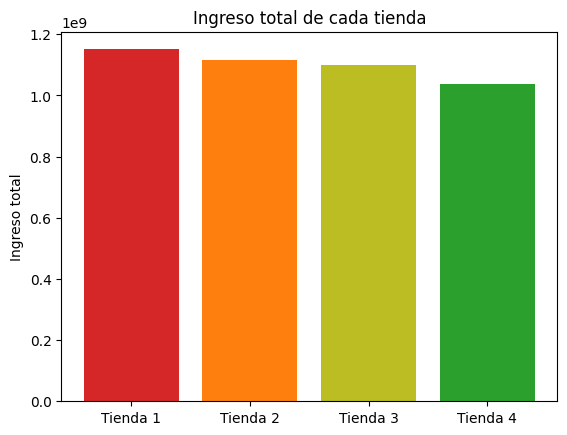

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
bar_colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green']

ax.bar(tiendas, ingresoTotal, color=bar_colors)

ax.set_ylabel('Ingreso total')
ax.set_title('Ingreso total de cada tienda')

plt.show()


# 2. Ventas por categoría

In [4]:
# Creamos un DataFrame para las ventas por categoría de cada tienda

ventasCat1 = tienda.groupby("Categoría del Producto")["Producto"].count()
ventasCat2 = tienda2.groupby("Categoría del Producto")["Producto"].count()
ventasCat3 = tienda3.groupby("Categoría del Producto")["Producto"].count()
ventasCat4 = tienda4.groupby("Categoría del Producto")["Producto"].count()

In [5]:
# Creamos un arreglo de cadenas con la categoría más vendida en cada tienda
categoriaMax = []
categoriaMax.append(ventasCat1.idxmax())
categoriaMax.append(ventasCat2.idxmax())
categoriaMax.append(ventasCat3.idxmax())
categoriaMax.append(ventasCat4.idxmax())

for i in range(1,5):
  print(f'La categoría con más ventas en la tienda {i} es {categoriaMax[i-1]}')

La categoría con más ventas en la tienda 1 es Muebles
La categoría con más ventas en la tienda 2 es Muebles
La categoría con más ventas en la tienda 3 es Muebles
La categoría con más ventas en la tienda 4 es Muebles


# 3. Calificación promedio de la tienda


In [6]:
# Creamos una lista de flotantes con la calificación promedio de cada tienda
from numpy import average

califTienda = []
califTienda.append(average(tienda['Calificación']))
califTienda.append(average(tienda2['Calificación']))
califTienda.append(average(tienda3['Calificación']))
califTienda.append(average(tienda4['Calificación']))

In [7]:
# Imprimimos los resultados de cada tienda
for i in range(1,5):
  print(f"El promedio de calificaciones de la tienda {i} es: {califTienda[i-1]}")

# Obtenemos la mayor y la menor calificación
maxim = max(califTienda)
minim = min(califTienda)

# Imprimimos las tiendas con mayor y menor calificación
print(f"La tienda con menor calificacion es la tienda {califTienda.index(minim)+1}, y la tienda con mayor calificación es la tienda {califTienda.index(maxim)+1}")

El promedio de calificaciones de la tienda 1 es: 3.976685036032217
El promedio de calificaciones de la tienda 2 es: 4.037303942348453
El promedio de calificaciones de la tienda 3 es: 4.048325561678677
El promedio de calificaciones de la tienda 4 es: 3.9957591178965224
La tienda con menor calificacion es la tienda 1, y la tienda con mayor calificación es la tienda 3


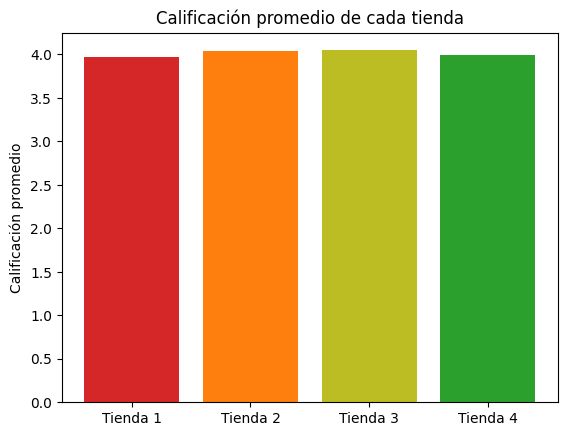

In [8]:
fig, ax = plt.subplots()

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
bar_colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green']

ax.bar(tiendas, califTienda, color=bar_colors)

ax.set_ylabel('Calificación promedio')
ax.set_title('Calificación promedio de cada tienda')

plt.show()

# 4. Productos más y menos vendidos

In [9]:
# Creamos dos listas para cuardar los productos con mayor y menor número de ventas
productMax = []
productMin = []

# Agregamos la etiqueta del producto con el mayor número de ventas
productMax.append(tienda.groupby("Producto")["Producto"].count().idxmax())
productMax.append(tienda2.groupby("Producto")["Producto"].count().idxmax())
productMax.append(tienda3.groupby("Producto")["Producto"].count().idxmax())
productMax.append(tienda4.groupby("Producto")["Producto"].count().idxmax())

# Agregamos la etiqueta del producto con el menor número de ventas
productMin.append(tienda.groupby("Producto")["Producto"].count().idxmin())
productMin.append(tienda2.groupby("Producto")["Producto"].count().idxmin())
productMin.append(tienda3.groupby("Producto")["Producto"].count().idxmin())
productMin.append(tienda4.groupby("Producto")["Producto"].count().idxmin())



In [10]:
# Imprimimos los productos con mayor y menor número de ventas de cada tienda
for i in range(0,4):
  print(f"El producto más vendido en la tienda {i+1} es: {productMax[i]}, y el menos vendido es: {productMin[i]}")

El producto más vendido en la tienda 1 es: Armario, y el menos vendido es: Auriculares con micrófono
El producto más vendido en la tienda 2 es: Iniciando en programación, y el menos vendido es: Juego de mesa
El producto más vendido en la tienda 3 es: Kit de bancas, y el menos vendido es: Bloques de construcción
El producto más vendido en la tienda 4 es: Cama box, y el menos vendido es: Guitarra eléctrica


# 5. Envío promedio por tienda

In [18]:
# Creamos una lista y guardamos el total de costos de envíos por tienda
enviosTienda = []
enviosPromTienda = []

enviosTienda.append(tienda['Costo de envío'].sum())
enviosTienda.append(tienda2['Costo de envío'].sum())
enviosTienda.append(tienda3['Costo de envío'].sum())
enviosTienda.append(tienda4['Costo de envío'].sum())

enviosPromTienda.append(average(tienda['Costo de envío']))
enviosPromTienda.append(average(tienda2['Costo de envío']))
enviosPromTienda.append(average(tienda3['Costo de envío']))
enviosPromTienda.append(average(tienda4['Costo de envío']))

In [19]:
# Imprimimos el costo de envío de cada tienda
for i in range(0,4):
  print(f"El costo de envío de la tienda {i+1} es de: {enviosTienda[i]} y su promedio es de {enviosPromTienda[i]}")

# Obtenemos el mayor y menor costo de envío
envioMax = max(enviosTienda)
envioMin = min(enviosTienda)

# Imprimimos las tiendas con mayor y menor costos de envío
print(f"La tienda con mayor costo de envíos es la tienda {enviosTienda.index(envioMax)+1} y la tienda con menor costo de envíos es la tienda {enviosTienda.index(envioMin)+1}")

El costo de envío de la tienda 1 es de: 61377900.0 y su promedio es de 26018.60958033065
El costo de envío de la tienda 2 es de: 59485100.0 y su promedio es de 25216.235693090293
El costo de envío de la tienda 3 es de: 58516600.0 y su promedio es de 24805.680373039424
El costo de envío de la tienda 4 es de: 55317400.0 y su promedio es de 23459.457167090754
La tienda con mayor costo de envíos es la tienda 1 y la tienda con menor costo de envíos es la tienda 4


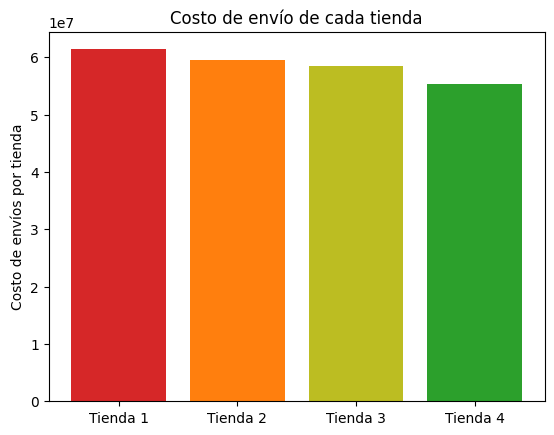

In [ ]:
fig, ax = plt.subplots()

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
bar_colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green']

ax.bar(tiendas, enviosTienda, color=bar_colors)

ax.set_ylabel('Costo de envíos por tienda')
ax.set_title('Costo de envío de cada tienda')

plt.show()

In [ ]:
gananciasTiendas = []
for i in range(0,4):
  gananciasTiendas.append(ingresoTotal[i]+enviosTienda[i])
gananciasTiendas

[np.float64(1212258300.0),
 np.float64(1175828600.0),
 np.float64(1156536200.0),
 np.float64(1093693100.0)]

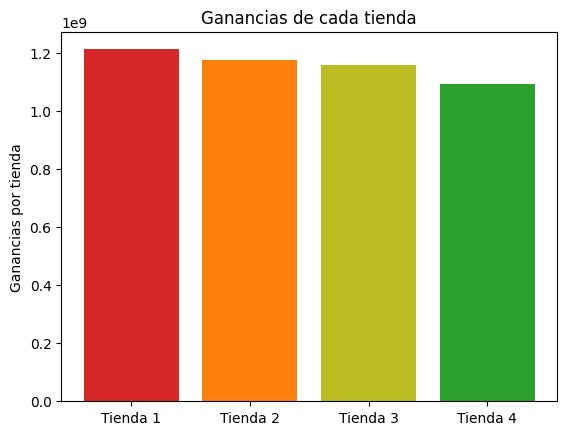

In [ ]:
fig, ax = plt.subplots()

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
bar_colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green']

ax.bar(tiendas, gananciasTiendas, color=bar_colors)

ax.set_ylabel('Ganancias por tienda')
ax.set_title('Ganancias de cada tienda')

plt.show()

# Informe Final
En base a los datos obtenidos durante el análisis de datos, podemos observar que la tienda 1 es la que tiene mayor cantidad de ingresos totales, sin embargo, tambien es la tienda que tiene menor promedio de calificaciones de usuarios y mayor costos de envío, tanto en valor total como en valor promedio. Esto significa que los clientes tienen menos satisfacción al comprar en esta tienda en comparación con las otras. Por otra parte, dado que tiene en promedio mayor costo de envio, el costo final del producto será mayor, lo cual hace mas dificil competir a largo plazo con otras tiendas.

## Conclusión
La tienda 1 es la tienda que da mayor cantidad de ganancias pero a largo plazo puede ser menos rentable por costos de envío y experiencias de usuario, por lo que se sugiere que sea vendida.